<a href="https://colab.research.google.com/github/KaikeGM/Challenge-Telecom-X-Analista-de-Dados-Parte-1/blob/main/TelecomX_BR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracão

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

url = "https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/refs/heads/main/TelecomX_Data.json"
dados = pd.read_json(url)

#🔧 Transformação

In [2]:
dados.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [3]:
dados_customer = pd.json_normalize(dados['Churn'])
dados_phone = pd.json_normalize(dados['phone'])
dados_internet = pd.json_normalize(dados['internet'])
dados_account = pd.json_normalize(dados['account'])

In [4]:
dados_customer.head()

""
0
1
2
3
4


In [5]:
dados_phone.head()

,PhoneService,MultipleLines
0,Yes,No
1,Yes,Yes
2,Yes,No
3,Yes,No
4,Yes,No


In [6]:
dados_internet.head()

,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,DSL,No,Yes,No,Yes,Yes,No
1,DSL,No,No,No,No,No,Yes
2,Fiber optic,No,No,Yes,No,No,No
3,Fiber optic,No,Yes,Yes,No,Yes,Yes
4,Fiber optic,No,No,No,Yes,Yes,No


In [7]:
dados_account.head()

,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,One year,Yes,Mailed check,65.6,593.3
1,Month-to-month,No,Mailed check,59.9,542.4
2,Month-to-month,Yes,Electronic check,73.9,280.85
3,Month-to-month,Yes,Electronic check,98.0,1237.85
4,Month-to-month,Yes,Mailed check,83.9,267.4


In [8]:
dados_normalizados = pd.concat([dados['Churn'], dados_customer, dados_phone, dados_internet, dados_account], axis=1)

In [9]:
dados_normalizados.head()

,Churn,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,No,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,No,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,Yes,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,Yes,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,Yes,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [10]:
colunas_desejadas = [
    'Churn',
    'Contract',
    'PaymentMethod',
    'PaperlessBilling',
    'Charges.Monthly',
    'Charges.Total',
    'InternetService',
    'OnlineSecurity',
    'TechSupport',
    'StreamingTV',
    'StreamingMovies'
]

dados_prontos = pd.concat([dados_normalizados[colunas_desejadas]], axis=1)


In [11]:
# Verifica a quantidade de valores ausentes por coluna
dados_prontos.isnull().sum()


,0
Churn,0
Contract,0
PaymentMethod,0
PaperlessBilling,0
Charges.Monthly,0
Charges.Total,0
InternetService,0
OnlineSecurity,0
TechSupport,0
StreamingTV,0


In [12]:
# Verifica se há linhas duplicadas
dados_prontos.duplicated().sum()

# Remove duplicadas se existirem
dados_prontos.drop_duplicates(inplace=True)


In [13]:
dados_prontos.dtypes

,0
Churn,object
Contract,object
PaymentMethod,object
PaperlessBilling,object
Charges.Monthly,float64
Charges.Total,object
InternetService,object
OnlineSecurity,object
TechSupport,object
StreamingTV,object


In [14]:

# Remove espaços e substitui strings vazias por NaN antes da conversão
dados_prontos['Charges.Total'] = dados_prontos['Charges.Total'].replace(" ", np.nan)

In [15]:
# Converte para float
dados_prontos['Charges.Total'] = pd.to_numeric(dados_prontos['Charges.Total'], errors='coerce')


In [16]:
# Verifica valores ausentes
dados_prontos.isnull().sum()


,0
Churn,0
Contract,0
PaymentMethod,0
PaperlessBilling,0
Charges.Monthly,0
Charges.Total,11
InternetService,0
OnlineSecurity,0
TechSupport,0
StreamingTV,0


In [17]:
# Preencher com a média
dados_prontos['Charges.Total'] = dados_prontos['Charges.Total'].fillna(dados_prontos['Charges.Total'].mean())


In [18]:
dados_prontos.isnull().sum()

,0
Churn,0
Contract,0
PaymentMethod,0
PaperlessBilling,0
Charges.Monthly,0
Charges.Total,0
InternetService,0
OnlineSecurity,0
TechSupport,0
StreamingTV,0


In [19]:
# Remove espaços extras e coloca tudo em minúsculas para consistência
colunas_categoricas = ['Churn', 'Contract', 'PaymentMethod', 'PaperlessBilling',
                       'InternetService', 'OnlineSecurity', 'TechSupport',
                       'StreamingTV', 'StreamingMovies']

for coluna in colunas_categoricas:
    dados_prontos[coluna] = dados_prontos[coluna].str.strip().str.lower()


In [20]:
dados_prontos.dtypes


,0
Churn,object
Contract,object
PaymentMethod,object
PaperlessBilling,object
Charges.Monthly,float64
Charges.Total,float64
InternetService,object
OnlineSecurity,object
TechSupport,object
StreamingTV,object


In [21]:
dados_prontos.describe(include='all')


,Churn,Contract,PaymentMethod,PaperlessBilling,Charges.Monthly,Charges.Total,InternetService,OnlineSecurity,TechSupport,StreamingTV,StreamingMovies
count,7190,7190,7190,7190,7190.000000,7190.000000,7190,7190,7190,7190,7190
unique,3,3,4,2,NaN,NaN,3,3,3,3,3
top,no,month-to-month,electronic check,yes,NaN,NaN,fiber optic,no,no,no,no
freq,5143,3928,2412,4268,NaN,NaN,3169,3569,3543,2857,2832
mean,NaN,NaN,NaN,NaN,64.961857,2304.643634,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,30.095639,2267.089312,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,18.250000,18.800000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,35.762500,420.262500,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,70.450000,1416.350000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,90.037500,3827.387500,NaN,NaN,NaN,NaN,NaN


In [22]:
dados_prontos['Churn'].unique()
dados_prontos['Churn'].value_counts()


,count
Churn,
no,5143
yes,1823
,224


In [23]:
# 1. Investigar os 224 registros "desconhecidos"
print(dados_prontos[dados_prontos['Churn'] == 'Unknown'])  # Ou outro valor não padrão

# 2. Corrigir/remover registros inconsistentes
# Opção A: Remover registros com Churn desconhecido
dados_clean = dados_prontos[dados_prontos['Churn'].isin(['no', 'yes'])]

# Opção B: Tratar como categoria específica (ex: 'unknown')
dados_prontos['Churn'] = dados_prontos['Churn'].replace({'Unknown': 'unknown'})

Empty DataFrame
Columns: [Churn, Contract, PaymentMethod, PaperlessBilling, Charges.Monthly, Charges.Total, InternetService, OnlineSecurity, TechSupport, StreamingTV, StreamingMovies]
Index: []


In [24]:
# Verificar valores ausentes (NaN)
print("Registros nulos:", dados_prontos['Churn'].isnull().sum())

# Verificar strings vazias
print("Strings vazias:", (dados_prontos['Churn'] == '').sum())

Registros nulos: 0
Strings vazias: 224


In [25]:
dados_prontos['Churn'] = dados_prontos['Churn'].replace({'': 'no'})

In [26]:
dados_prontos['Churn'] = dados_prontos['Churn'].map({'no': 0, 'yes': 1})

In [27]:
print("Valores únicos após tratamento:", dados_prontos['Churn'].unique())
print(dados_prontos['Churn'].value_counts())

Valores únicos após tratamento: [0 1]
Churn
0    5367
1    1823
Name: count, dtype: int64


In [28]:
# 1. Conferir totais
print("Total de registros:", len(dados_prontos))
print("Clientes ativos (0):", (dados_prontos['Churn'] == 0).sum())
print("Clientes evadidos (1):", (dados_prontos['Churn'] == 1).sum())

# 2. Checar ausências residuais
print("Valores faltantes:", dados_prontos['Churn'].isnull().sum())

Total de registros: 7190
Clientes ativos (0): 5367
Clientes evadidos (1): 1823
Valores faltantes: 0


In [29]:
dados_prontos.to_csv('dados_prontos.csv', index=False)

#📊 Carga e análise

In [30]:
contract_churn = dados_prontos.groupby('Contract')['Churn'].agg(['mean', 'count'])
print(contract_churn)

                    mean  count
Contract                       
month-to-month  0.409623   3928
one year        0.109282   1519
two year        0.027539   1743


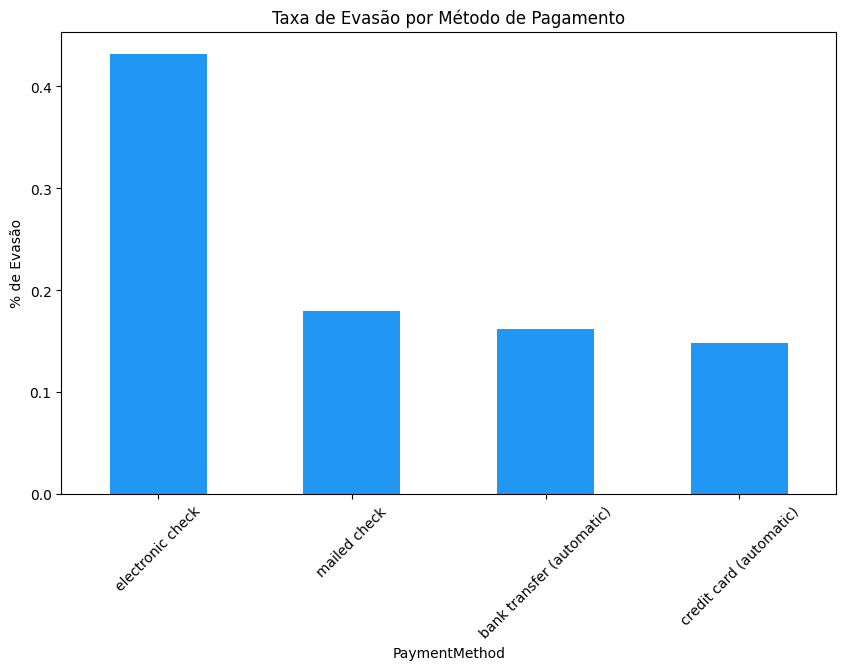

In [31]:
import matplotlib.pyplot as plt
payment_churn = dados_prontos.groupby('PaymentMethod')['Churn'].mean().sort_values(ascending=False)
plt.figure(figsize=(10,6))
payment_churn.plot(kind='bar', color='#2196F3')
plt.title('Taxa de Evasão por Método de Pagamento')
plt.ylabel('% de Evasão')
plt.xticks(rotation=45)
plt.show()

/tmp/ipython-input-1625173070.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_counts.index, y=churn_counts.values, palette=['#4CAF50', '#F44336'])


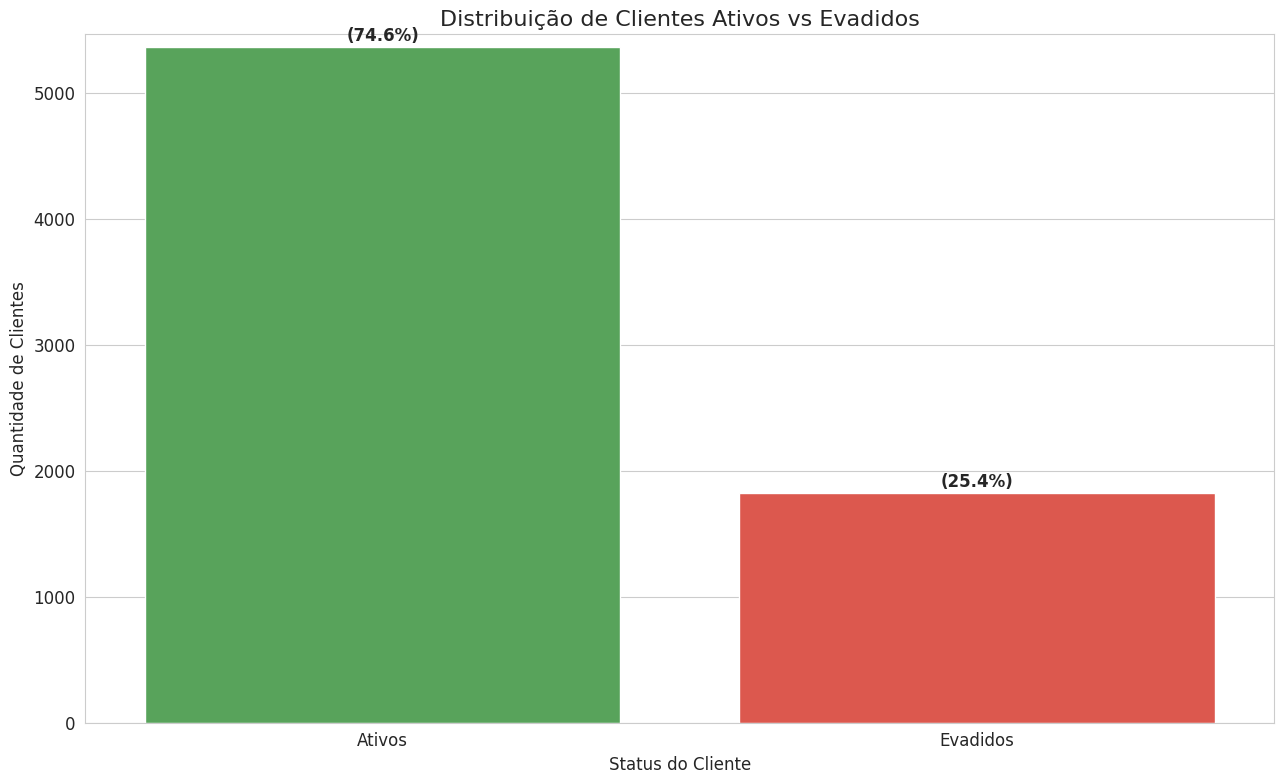

In [32]:
# Configurações
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12


# Distribuição de Churn
churn_counts = dados_prontos['Churn'].value_counts()
plt.figure(figsize=(13, 8))
sns.barplot(x=churn_counts.index, y=churn_counts.values, palette=['#4CAF50', '#F44336'])
plt.title('Distribuição de Clientes Ativos vs Evadidos', fontsize=16)
plt.xlabel('Status do Cliente')
plt.ylabel('Quantidade de Clientes')
plt.xticks([0, 1], ['Ativos', 'Evadidos'])
plt.ylim(0, max(churn_counts.values) + 100)

for i, count in enumerate(churn_counts):
    plt.text(i, count + 50, f"({count/len(dados_prontos)*100:.1f}%)",
             ha='center', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.savefig('churn_distribution.png', dpi=300)
plt.show()

Valores únicos em 'Contract': ['month-to-month', 'one year', 'two year']


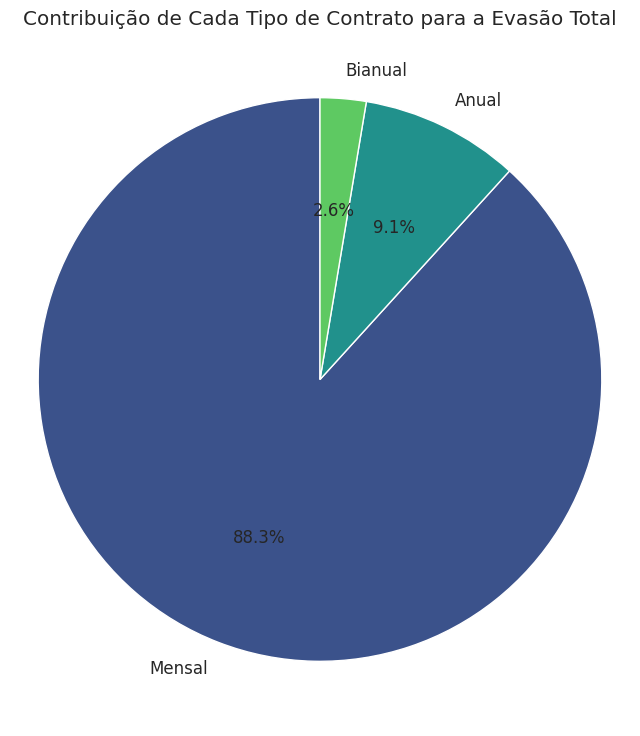

In [33]:
dados_evadiram = dados_prontos[dados_prontos['Churn'] == 1]

# Conta os contratos dos evadidos
churn_contract_counts = dados_evadiram['Contract'].value_counts()

# Mostra os valores únicos para garantir o mapeamento correto
print("Valores únicos em 'Contract':", churn_contract_counts.index.tolist())

# Dicionário de tradução
mapa_contratos = {
    'month-to-month': 'Mensal',
    'one year': 'Anual',
    'two year': 'Bianual'
}

# Aplica o mapeamento e substitui possíveis NaNs pelo valor original
churn_contract_counts.index = churn_contract_counts.index.map(mapa_contratos)

# Cores
colors = sns.color_palette('viridis', len(churn_contract_counts))

# Gráfico de pizza
plt.figure(figsize=(8, 9))
plt.pie(churn_contract_counts.values,
        labels=churn_contract_counts.index,
        colors=colors,
        autopct='%1.1f%%',
        startangle=90)

plt.title('Contribuição de Cada Tipo de Contrato para a Evasão Total')
plt.axis('equal')
plt.savefig('churn_contrato.png', dpi=300)
plt.show()

/tmp/ipython-input-2865522108.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=var, y='Churn', data=dados_prontos, ax=axes[i], errorbar=None, palette='viridis')
/tmp/ipython-input-2865522108.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=var, y='Churn', data=dados_prontos, ax=axes[i], errorbar=None, palette='viridis')



--- PaymentMethod ---
electronic check: 43.2% (n=2412)
mailed check: 18.0% (n=1622)
bank transfer (automatic): 16.2% (n=1588)
credit card (automatic): 14.8% (n=1568)

--- OnlineSecurity ---
no: 40.0% (n=3569)
yes: 14.2% (n=2078)
no internet service: 6.6% (n=1543)


/tmp/ipython-input-2865522108.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=var, y='Churn', data=dados_prontos, ax=axes[i], errorbar=None, palette='viridis')
/tmp/ipython-input-2865522108.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=var, y='Churn', data=dados_prontos, ax=axes[i], errorbar=None, palette='viridis')



--- TechSupport ---
no: 39.8% (n=3543)
yes: 14.7% (n=2104)
no internet service: 6.6% (n=1543)

--- PaperlessBilling ---
yes: 31.9% (n=4268)
no: 15.7% (n=2922)


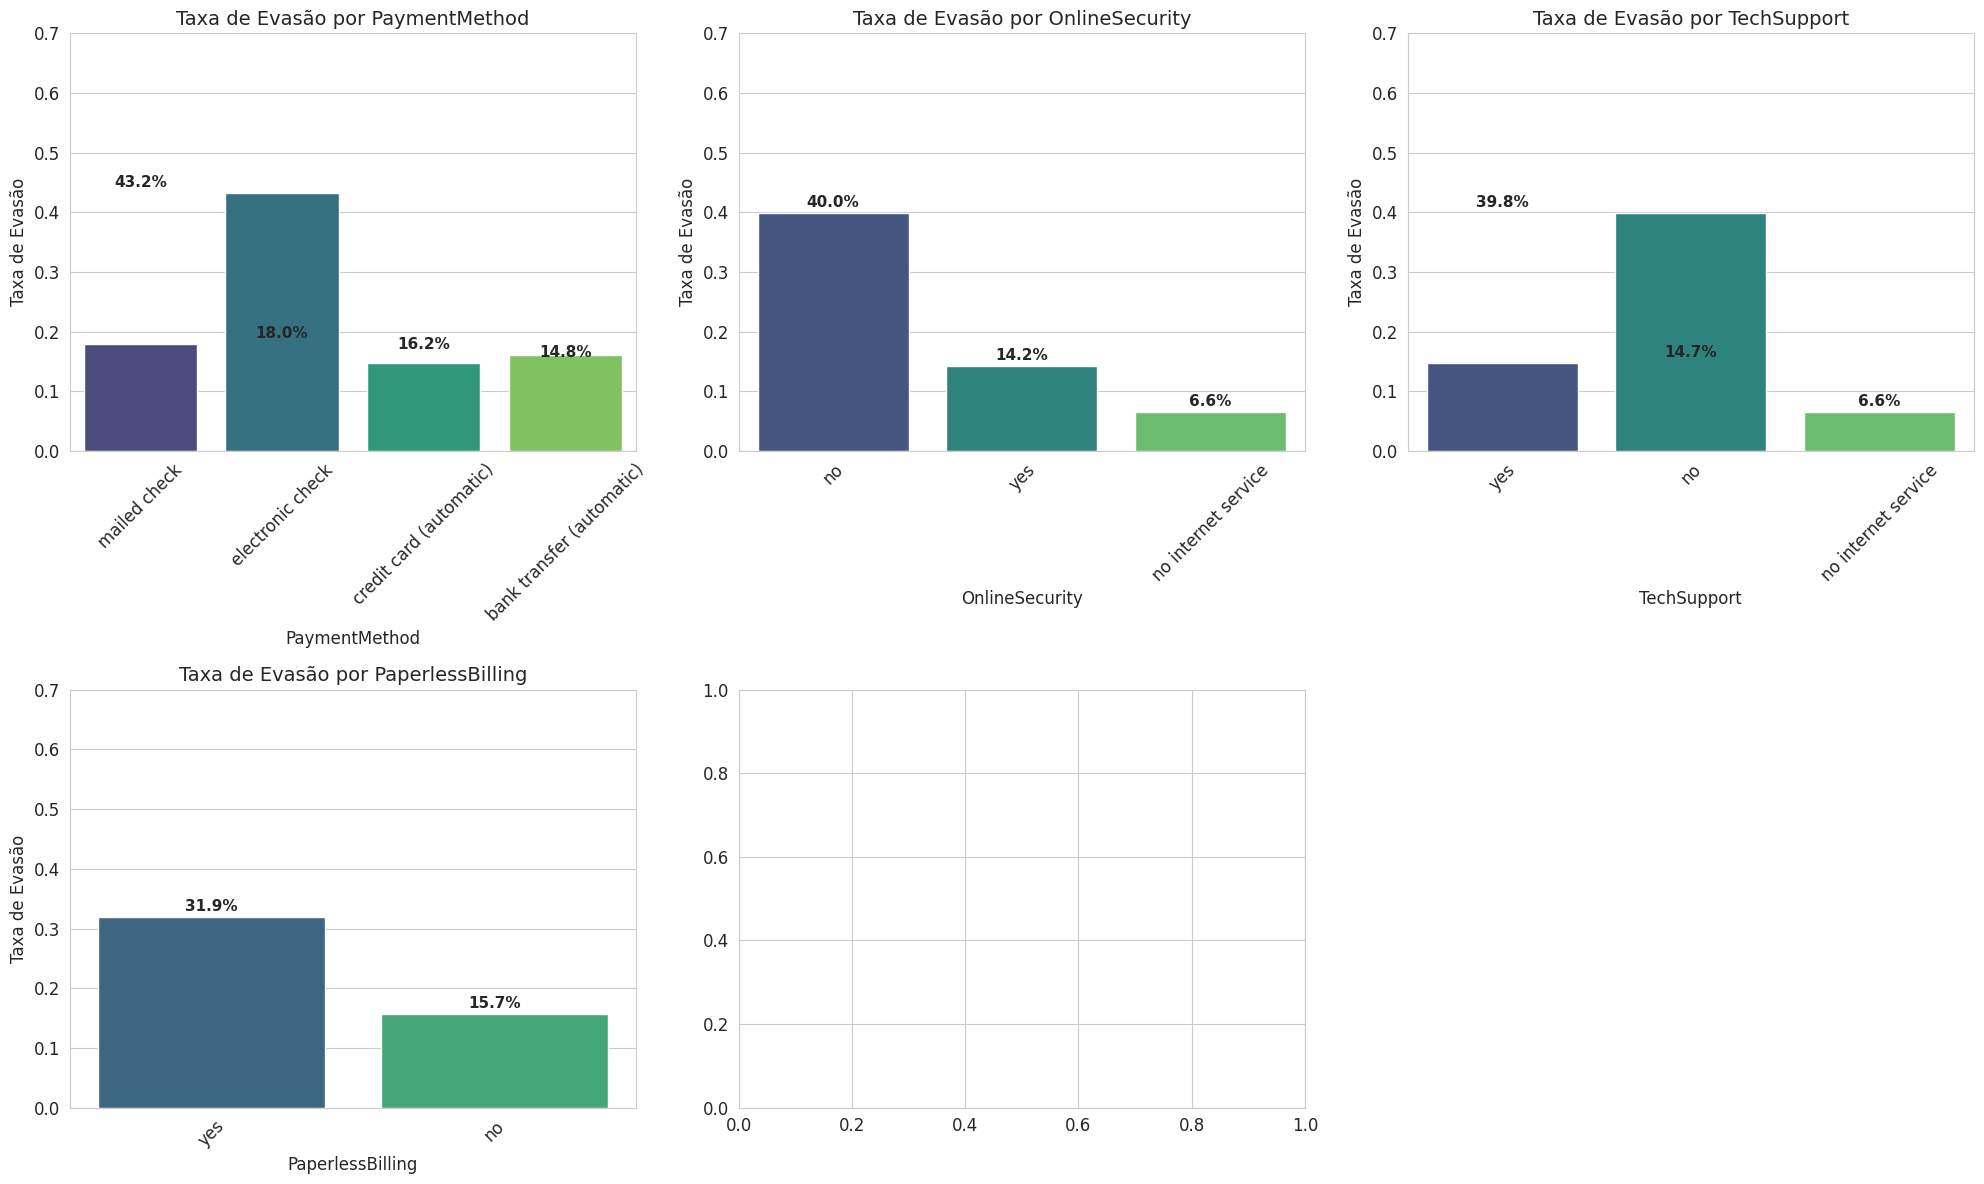


Análise por Variáveis Numéricas:


/tmp/ipython-input-2865522108.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=var, data=dados_prontos, palette=['#4CAF50', '#F44336'])
/tmp/ipython-input-2865522108.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=var, data=dados_prontos, palette=['#4CAF50', '#F44336'])


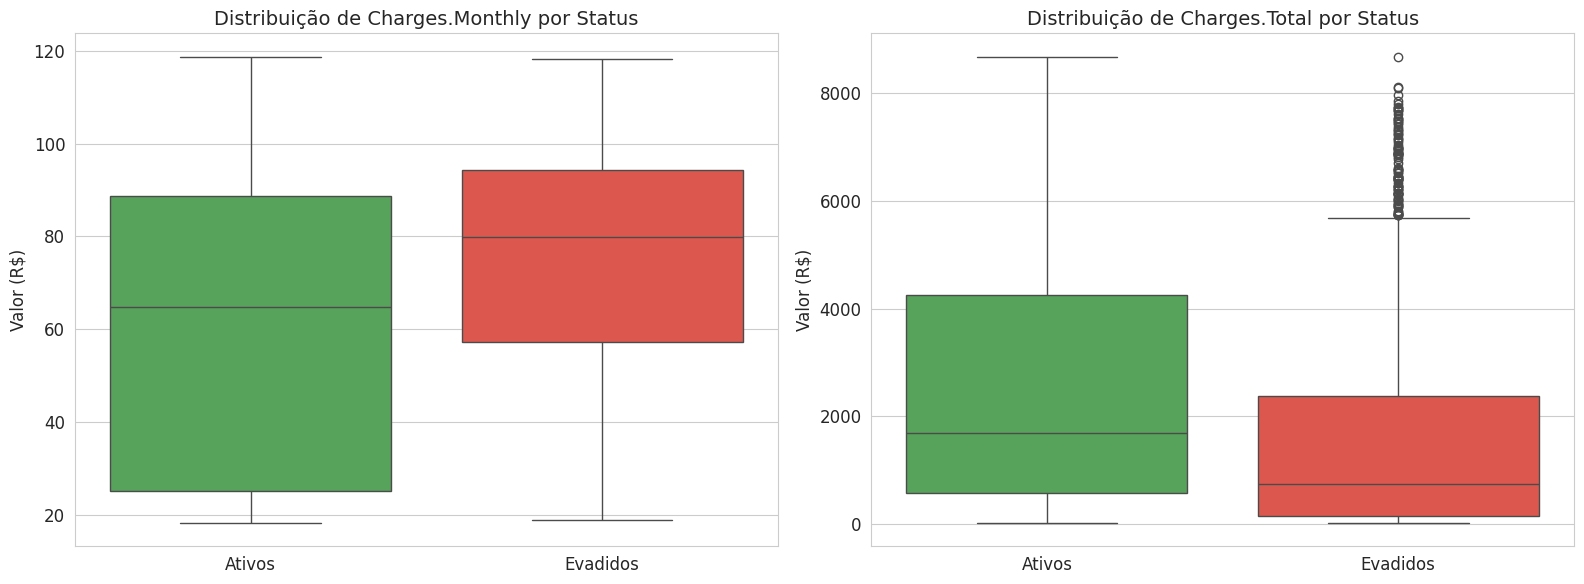

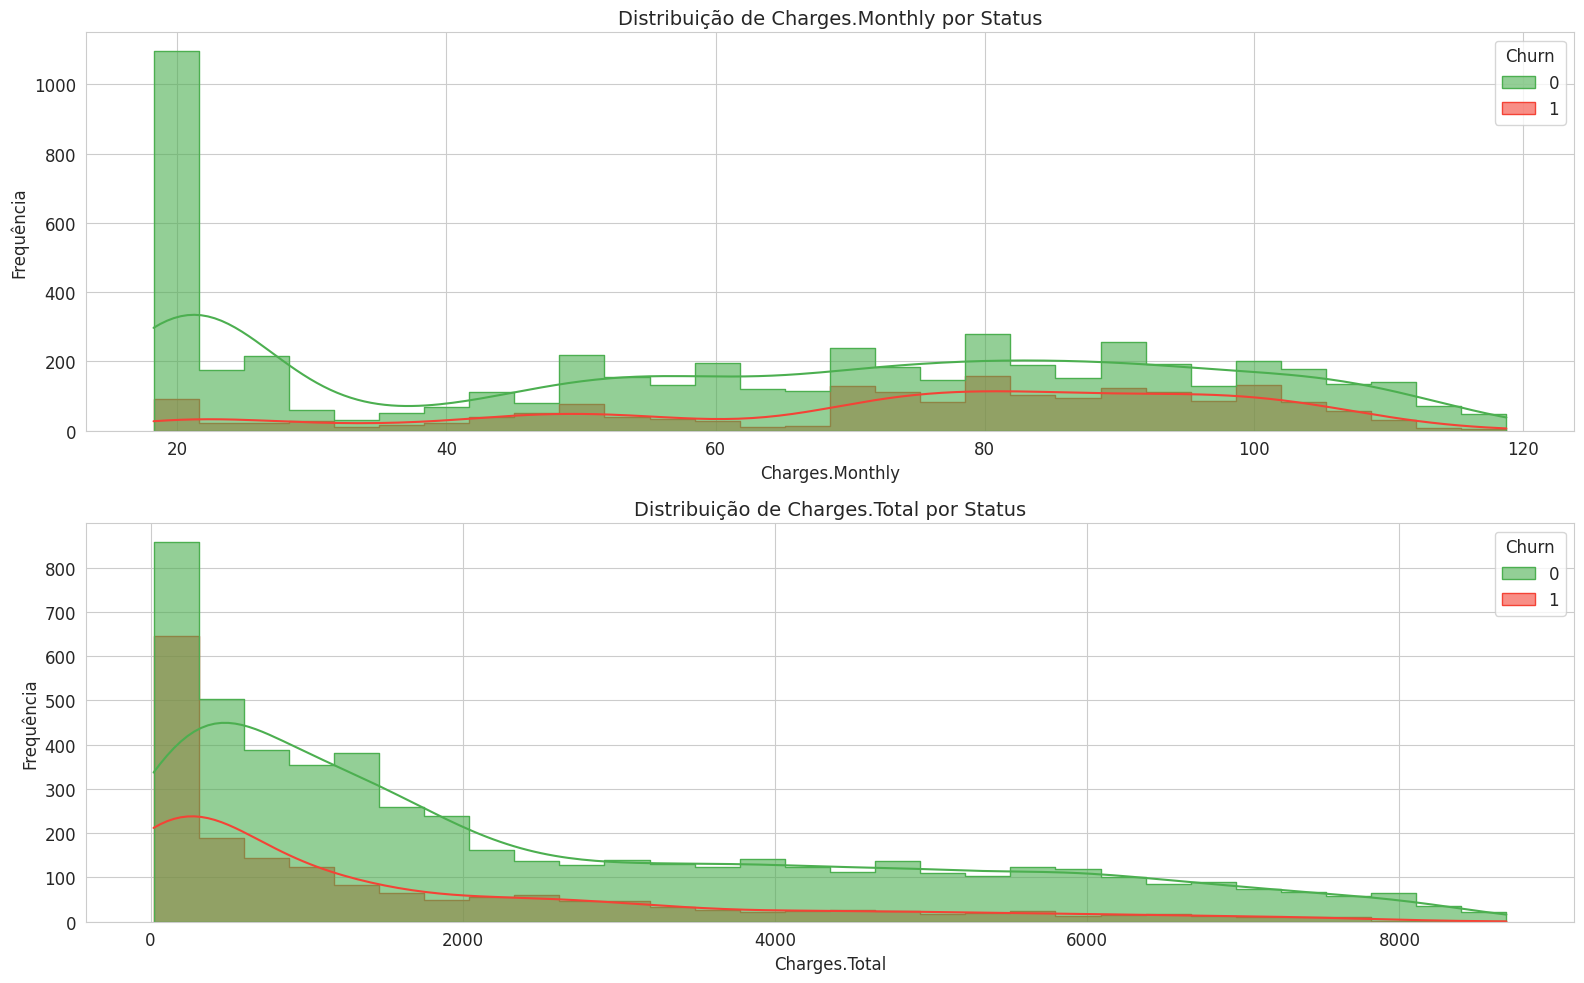


Estatísticas Descritivas por Grupo de Clientes:

--- Charges.Monthly ---
        count   mean    std    min   25%   50%   75%     max
Churn                                                       
0      5367.0  61.57  31.05  18.25  25.2  64.8  88.8  118.75
1      1823.0  74.93  24.52  18.85  57.3  79.9  94.4  118.35

Diferenças:
Média: 21.7%
Mediana: 23.3%

--- Charges.Total ---
        count     mean      std    min     25%      50%      75%      max
Churn                                                                    
0      5367.0  2554.50  2326.83  18.80  581.78  1686.15  4263.73  8672.45
1      1823.0  1569.06  1899.74  18.85  154.75   751.65  2372.23  8684.80

Diferenças:
Média: -38.6%
Mediana: -55.4%

Análise de Correlação:

Correlações mais fortes com Churn:
Churn                                    1.000000
PaymentMethod_electronic check           0.291458
Charges.Monthly                          0.193136
PaymentMethod_credit card (automatic)   -0.128177
TechSupport_yes    

/tmp/ipython-input-2865522108.py:105: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_corr.values, y=top_corr.index, palette='coolwarm')


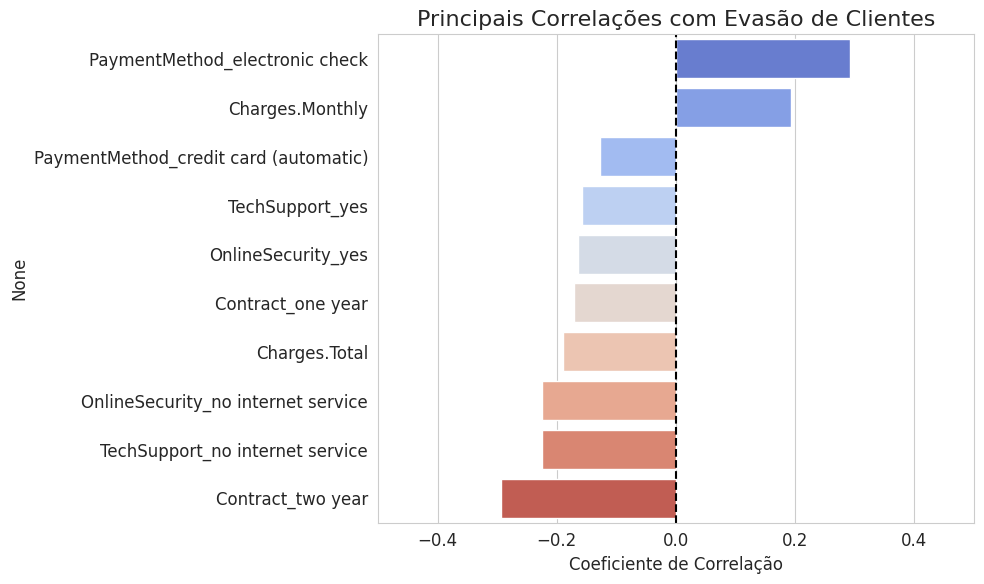

In [34]:


categorical_vars = ['PaymentMethod', 'OnlineSecurity', 'TechSupport', 'PaperlessBilling']
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.flatten()

for i, var in enumerate(categorical_vars):
    # Calcular taxas de churn
    churn_rate = dados_prontos.groupby(var)['Churn'].mean().sort_values(ascending=False)

    # Plotar gráfico de barras
    sns.barplot(x=var, y='Churn', data=dados_prontos, ax=axes[i], errorbar=None, palette='viridis')

    # Adicionar valores nas barras
    for j, rate in enumerate(churn_rate):
        axes[i].text(j, rate + 0.01, f"{rate*100:.1f}%", ha='center', fontsize=11, fontweight='bold')

    axes[i].set_title(f'Taxa de Evasão por {var}', fontsize=14)
    axes[i].set_ylabel('Taxa de Evasão')
    axes[i].set_ylim(0, 0.7)
    axes[i].tick_params(axis='x', rotation=45)

    # Imprimir estatísticas no console
    print(f"\n--- {var} ---")
    for category, rate in churn_rate.items():
        count = sum(dados_prontos[var] == category)
        print(f"{category}: {rate*100:.1f}% (n={count})")

# Remover eixo vazio
fig.delaxes(axes[5])
plt.tight_layout()
plt.savefig('churn_categorical.png', dpi=300)
plt.show()

# Análise por Variáveis Numéricas
print("\n" + "="*50)
print("Análise por Variáveis Numéricas:")
print("="*50)

numeric_vars = ['Charges.Monthly', 'Charges.Total']

# Boxplots
plt.figure(figsize=(16, 6))
for i, var in enumerate(numeric_vars, 1):
    plt.subplot(1, 2, i)
    sns.boxplot(x='Churn', y=var, data=dados_prontos, palette=['#4CAF50', '#F44336'])
    plt.title(f'Distribuição de {var} por Status', fontsize=14)
    plt.xlabel('')
    plt.xticks([0, 1], ['Ativos', 'Evadidos'])
    plt.ylabel('Valor (R$)')
plt.tight_layout()
plt.savefig('churn_numeric_boxplot.png', dpi=300)
plt.show()

# Histogramas comparativos
plt.figure(figsize=(16, 10))
for i, var in enumerate(numeric_vars, 1):
    plt.subplot(2, 1, i)
    sns.histplot(data=dados_prontos, x=var, hue='Churn', kde=True,
                 element='step', palette=['#4CAF50', '#F44336'], bins=30, alpha=0.6)
    plt.title(f'Distribuição de {var} por Status', fontsize=14)
    plt.xlabel(var)
    plt.ylabel('Frequência')
plt.tight_layout()
plt.savefig('churn_numeric_histogram.png', dpi=300)
plt.show()

# Estatísticas Descritivas por Grupo
print("\nEstatísticas Descritivas por Grupo de Clientes:")
for var in numeric_vars:
    print(f"\n--- {var} ---")
    stats = dados_prontos.groupby('Churn')[var].describe().round(2)
    print(stats)

    # Calcular diferenças percentuais
    mean_diff = (stats.loc[1, 'mean'] - stats.loc[0, 'mean']) / stats.loc[0, 'mean'] * 100
    median_diff = (stats.loc[1, '50%'] - stats.loc[0, '50%']) / stats.loc[0, '50%'] * 100
    print(f"\nDiferenças:")
    print(f"Média: {mean_diff:.1f}%")
    print(f"Mediana: {median_diff:.1f}%")

# Análise de Correlação (Versão Corrigida)
print("\n" + "="*50)
print("Análise de Correlação:")
print("="*50)

# Preparar dados numéricos para correlação
corr_data = dados_prontos[['Churn', 'Charges.Monthly', 'Charges.Total']].copy()

# Converter variáveis categóricas relevantes para formato numérico
for var in ['Contract', 'PaymentMethod', 'OnlineSecurity', 'TechSupport']:
    # Criar variáveis dummy
    dummies = pd.get_dummies(dados_prontos[var], prefix=var, drop_first=True)
    corr_data = pd.concat([corr_data, dummies], axis=1)

# Calcular correlações
correlations = corr_data.corr()['Churn'].sort_values(ascending=False)

# Filtrar correlações mais relevantes
print("\nCorrelações mais fortes com Churn:")
significant_corrs = correlations[abs(correlations) > 0.1]
print(significant_corrs.to_string())

# Gráfico de correlação
plt.figure(figsize=(10, 6))
top_corr = significant_corrs.drop('Churn')
sns.barplot(x=top_corr.values, y=top_corr.index, palette='coolwarm')
plt.title('Principais Correlações com Evasão de Clientes', fontsize=16)
plt.xlabel('Coeficiente de Correlação')
plt.xlim(-0.5, 0.5)
plt.axvline(0, color='black', linestyle='--')
plt.tight_layout()
plt.savefig('churn_correlations.png', dpi=300)
plt.show()